## AKONA CIKO _Project

### README.md|txt file

### Requirement.txt|file

### Technologies Used

### Necessary Libraries & Packages

### Table of Contents

### Libraries & Packages_

In [ ]:
--------------------------------------------------------------> Netflix Kick-off ! ! <------------------------------------------------------------------

### 1. Introduction:

In [1]:
pip install kaggle

In [2]:
import os
import shutil

home = os.path.expanduser("~")  # Get home directory
kaggle_dir = os.path.join(home, ".kaggle")

os.makedirs(kaggle_dir, exist_ok=True)  # Create .kaggle directory if not exists
shutil.move("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 600)  # Set correct permissions

In [1]:
import os

print(os.listdir())  # Lists all files in the current directory

['.ipynb_checkpoints', 'Classification _Netflix Movies & TV Shows_.ipynb', 'Classification _Nextflix Movies & TV Shows.zip']


In [5]:
import zipfile

with zipfile.ZipFile("Classification _Nextflix Movies & TV Shows.zip", "r") as zip_ref:
    zip_ref.extractall("netflix_dataset")  # Extract to a new folder

In [6]:
print(os.listdir("netflix_dataset"))  # Lists extracted files

['netflix_titles.csv']


### 2. Exploratory Data Analysis [EDA]:

##### a) Data Understanding_

In [2]:
import pandas as pd

df = pd.read_csv("netflix_dataset/netflix_titles.csv")  # Update with the actual filename
df.head()  # Display the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info() # Displays set features / dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe() # Displays Summary Stats

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


 ##### b) Data Cleaning & Preprocessing_

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Handling missing values
missing_values = df.isnull().sum()
display(missing_values)

# Fill missing values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Fill missing values in 'rating' with the most common rating
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

df['date_added'] = df['date_added'].astype(str).str.strip()  # Remove leading/trailing spaces
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year, month, and day from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Process 'duration' column
# Extract numeric values (minutes for movies, seasons for TV shows)
df['duration'] = df['duration'].str.extract(r'(\d+)')
df['duration'] = pd.to_numeric(df['duration'])

display(df.head())

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])

# Text preprocessing for 'description'
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['clean_description'] = df['description'].astype(str).str.lower()
df['clean_description'] = df['clean_description'].str.replace('[^a-zA-Z]', ' ', regex=True)
df['clean_description'] = df['clean_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
description_tfidf = vectorizer.fit_transform(df['clean_description']).toarray()

# Display cleaned dataset
display(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F8871503\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,type_encoded,rating_encoded,clean_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021.0,0,7,father nears end life filmmaker kirsten johnso...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,1,11,crossing paths party cape town teen sets prove...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1,11,protect family powerful drug lord skilled thie...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Unknown,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,1,11,feuds flirtations toilet talk go among incarce...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,1,11,city coaching centers known train india finest...


In [ ]:
--------------------------------------------------------------------------------------------------------------------------------------------------------

##### c) Summary Statistics_

In [11]:
print("\nGeneral Summary:")
print(df.shape)
print(df.describe())

# Categorical value counts
print("\nType Distribution:")
print(df['type'].value_counts())
print("\nRating Distribution:")
print(df['rating'].value_counts())


General Summary:
(8807, 16)
                          date_added  release_year     duration   year_added  \
count                           8797   8807.000000  8804.000000  8797.000000   
mean   2019-05-17 05:59:08.436967168   2014.180198    69.846888  2018.871888   
min              2008-01-01 00:00:00   1925.000000     1.000000  2008.000000   
25%              2018-04-06 00:00:00   2013.000000     2.000000  2018.000000   
50%              2019-07-02 00:00:00   2017.000000    88.000000  2019.000000   
75%              2020-08-19 00:00:00   2019.000000   106.000000  2020.000000   
max              2021-09-25 00:00:00   2021.000000   312.000000  2021.000000   
std                              NaN      8.819312    50.814828     1.574243   

       type_encoded  rating_encoded  
count   8807.000000     8807.000000  
mean       0.303849       10.015215  
min        0.000000        0.000000  
25%        0.000000        9.000000  
50%        0.000000       11.000000  
75%        1.000000   

** Next 3 plots, are "Distribution Analysis"_***

C:\Users\F8871503\ProgramData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


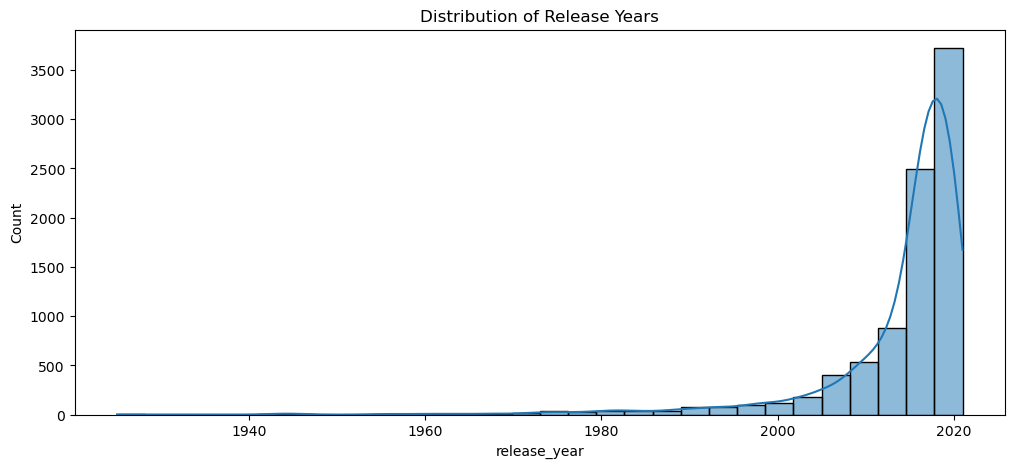

In [12]:
#1. Distribution Analysis

plt.figure(figsize=(12, 5))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.show()

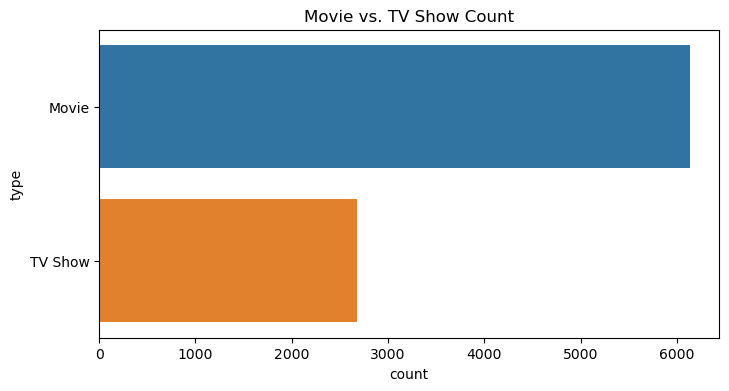

In [13]:
#2. Distribution Analysis

plt.figure(figsize=(8, 4))
sns.countplot(y=df['type'], order=df['type'].value_counts().index)
plt.title("Movie vs. TV Show Count")
plt.show()

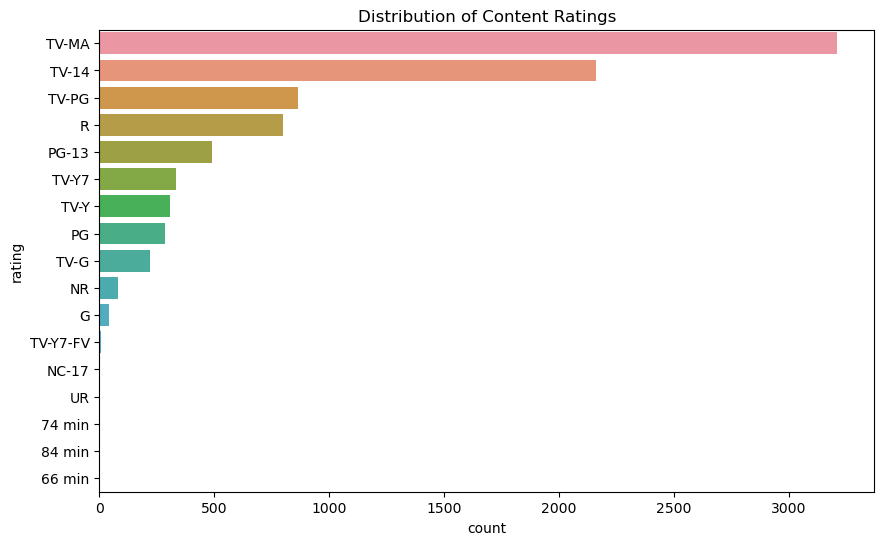

In [14]:
#3. Distribution Analysis

plt.figure(figsize=(10, 6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

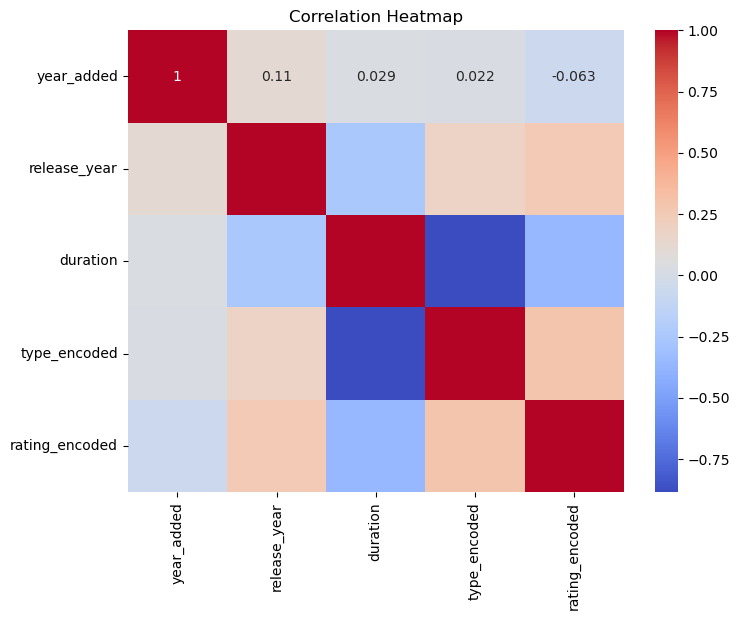

In [15]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df[['year_added', 'release_year', 'duration', 'type_encoded', 'rating_encoded']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### d) Visualizations_ 


### 3. Feature Engineering:

In [ ]:
a) Handling Missing Values_

# Handling missing values
missing_values = df.isnull().sum()
display(missing_values)

# Fill missing values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Fill missing values in 'rating' with the most common rating
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year, month, and day from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Process 'duration' column
# Extract numeric values (minutes for movies, seasons for TV shows)
df['duration'] = df['duration'].str.extract(r'(\d+)')
df['duration'] = pd.to_numeric(df['duration'])

display(df.head())

In [ ]:
b) Encoding Categorical Features_
# Encode categorical variables
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])

# Text preprocessing for 'description'
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['clean_description'] = df['description'].astype(str).str.lower()
df['clean_description'] = df['clean_description'].str.replace('[^a-zA-Z]', ' ', regex=True)
df['clean_description'] = df['clean_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
description_tfidf = vectorizer.fit_transform(df['clean_description']).toarray()

# Display cleaned dataset
display(df.head())

In [ ]:
c) Feature Selection_


### 4. 